In [2]:
import torch
import torch.nn as nn
import ltn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
# Configure LTNtorch to use the appropriate device
ltn.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {ltn.device}")

Using device: cpu


## Dataset de treino feito em sala

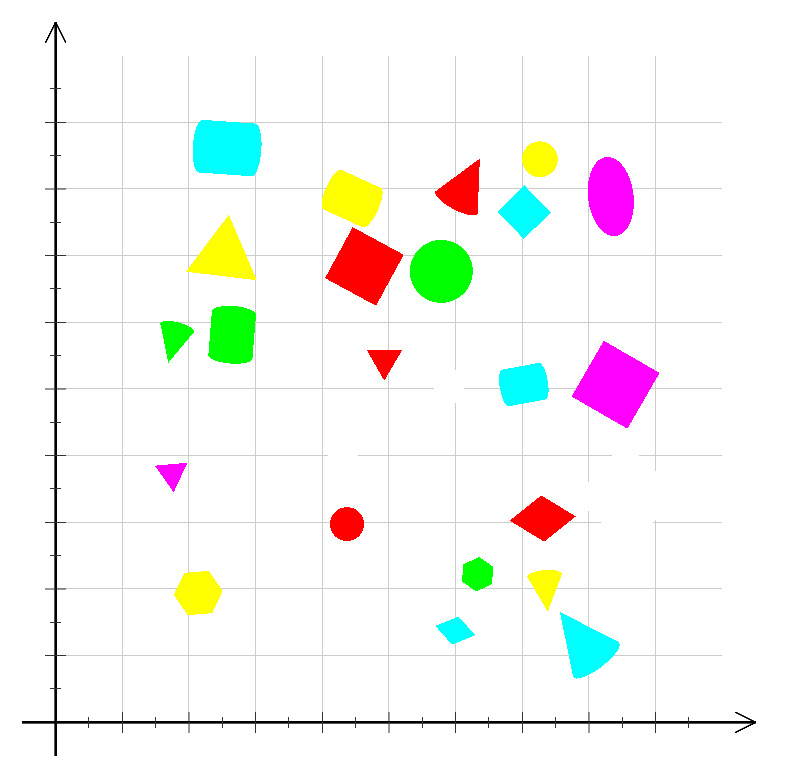

Houve uma confusão na equipe durante o exercício em sala para criar o dataset de treino do trabalho:
- Acabamos colocando mais do que 5 formas requeridas (elipse, heágono e losango)
- As cores não ficaram one-hot. Na verdade, isso não era um problema, pois conversamos com o professor durante a tarefa sobre fazer uma configuração RGB binária (0 ou 1 em cada canal). O problema é que o dataset entregue no exercício não havia objetos de cor preta e azul (não ciano). Além disso, a cor branca ficou difícil de visualizar. 

Ainda temos as características de cada objeto, por isso conseguimos compreender os 25 objetos:


| Formato: ID | Tipo | Coordenadas (X,Y) | Tamanho | Rotacao | Cor RGB |
| ----------- | ---- | ----------------- | ------- | ------- | ------- |
|  1 | Quadrado   | ( 0.8399,  0.5064) |  0.0483 |  330.0° | (1,0,1) |
|  2 | Quadrado   | ( 0.8567,  0.3403) |  0.0563 |   47.6° | (1,1,1) |
|  3 | Cone       | ( 0.4397,  0.4068) |  0.0276 |  296.9° | (1,1,1) |
|  4 | Circulo    | ( 0.4370,  0.2973) |  0.0255 |   65.0° | (1,0,0) |
|  5 | Triangulo  | ( 0.2523,  0.7002) |  0.0617 |  113.1° | (1,1,0) |
|  6 | Hexagono   | ( 0.2139,  0.1940) |  0.0367 |   64.7° | (1,1,0) |
|  7 | Losango    | ( 0.7305,  0.3057) |  0.0497 |   93.8° | (1,0,0) |
|  8 | Elipse     | ( 0.8327,  0.7886) |  0.0427 |  276.9° | (1,0,1) |
|  9 | Cilindro   | ( 0.2571,  0.8614) |  0.0396 |  265.9° | (0,1,1) |
| 10 | Circulo    | ( 0.7263,  0.8446) |  0.0268 |   20.9° | (1,1,0) |
| 11 | Triangulo  | ( 0.5949,  0.5001) |  0.0360 |  340.5° | (1,1,1) |
| 12 | Circulo    | ( 0.5785,  0.6765) |  0.0473 |   75.5° | (0,1,0) |
| 13 | Cone       | ( 0.6152,  0.8060) |  0.0360 |  332.1° | (1,0,0) |
| 14 | Triangulo  | ( 0.4930,  0.5430) |  0.0306 |  299.9° | (1,0,0) |
| 15 | Cilindro   | ( 0.4446,  0.7856) |  0.0326 |   65.5° | (1,1,0) |
| 16 | Quadrado   | ( 0.7027,  0.7653) |  0.0284 |   44.3° | (0,1,1) |
| 17 | Cone       | ( 0.1770,  0.5710) |  0.0263 |  165.9° | (0,1,0) |
| 18 | Losango    | ( 0.5993,  0.1377) |  0.0309 |  256.9° | (0,1,1) |
| 19 | Quadrado   | ( 0.4630,  0.6838) |  0.0435 |  151.5° | (1,0,0) |
| 20 | Cone       | ( 0.7353,  0.1987) |  0.0262 |  184.8° | (1,1,0) |
| 21 | Cone       | ( 0.7891,  0.1224) |  0.0434 |   37.2° | (0,1,1) |
| 22 | Hexagono   | ( 0.6330,  0.2222) |  0.0260 |   24.6° | (0,1,0) |
| 23 | Cilindro   | ( 0.7022,  0.5066) |  0.0279 |  100.5° | (0,1,1) |
| 24 | Cilindro   | ( 0.2647,  0.5813) |  0.0332 |  355.4° | (0,1,0) |
| 25 | Triangulo  | ( 0.1745,  0.3731) |  0.0282 |  305.2° | (1,0,1) |

Pedimos perdão pela confusão. Para este trabalhos, vamos fazer as seguintes substituições:
- Formas: 
    - `Hexágono -> Triangulo`
    - `Losango -> Quadrado`
    - `Elipse -> Círculo`
- Cores: 
    - `(1,1,1) -> (0,0,1)`
    - `(0,1,1) -> (0,0,1)`
    - `(1,1,0) -> (0,1,0)`
    - `(1,0,1) -> (1,0,0)`

Além disso, também iremos tirar a coluna rotações que não há necessidade para este trabalho. A tabela final então fica:

| Formato: ID | Tipo | Coordenadas (X,Y) | Tamanho | Cor RGB |
| ----------- | ---- | ----------------- | ------- |  ------- |
|  1 | Quadrado   | ( 0.8399,  0.5064) |  0.0483 | (1,0,0) |
|  2 | Quadrado   | ( 0.8567,  0.3403) |  0.0563 | (0,0,1) |
|  3 | Cone       | ( 0.4397,  0.4068) |  0.0276 | (0,0,1) |
|  4 | Circulo    | ( 0.4370,  0.2973) |  0.0255 | (1,0,0) |
|  5 | Triangulo  | ( 0.2523,  0.7002) |  0.0617 | (0,1,0) |
|  6 | Triangulo   | ( 0.2139,  0.1940) |  0.0367 | (0,1,0) |
|  7 | Quadrado    | ( 0.7305,  0.3057) |  0.0497 | (1,0,0) |
|  8 | Circulo     | ( 0.8327,  0.7886) |  0.0427 | (1,0,0) |
|  9 | Cilindro   | ( 0.2571,  0.8614) |  0.0396 | (0,0,1) |
| 10 | Circulo    | ( 0.7263,  0.8446) |  0.0268 | (0,1,0) |
| 11 | Triangulo  | ( 0.5949,  0.5001) |  0.0360 | (0,0,1) |
| 12 | Circulo    | ( 0.5785,  0.6765) |  0.0473 | (0,1,0) |
| 13 | Cone       | ( 0.6152,  0.8060) |  0.0360 | (1,0,0) |
| 14 | Triangulo  | ( 0.4930,  0.5430) |  0.0306 | (1,0,0) |
| 15 | Cilindro   | ( 0.4446,  0.7856) |  0.0326 | (0,1,0) |
| 16 | Quadrado   | ( 0.7027,  0.7653) |  0.0284 | (0,0,1) |
| 17 | Cone       | ( 0.1770,  0.5710) |  0.0263 | (0,1,0) |
| 18 | Quadrado    | ( 0.5993,  0.1377) |  0.0309 | (0,0,1) |
| 19 | Quadrado   | ( 0.4630,  0.6838) |  0.0435 | (1,0,0) |
| 20 | Cone       | ( 0.7353,  0.1987) |  0.0262 | (0,1,0) |
| 21 | Cone       | ( 0.7891,  0.1224) |  0.0434 | (0,0,1) |
| 22 | Triangulo   | ( 0.6330,  0.2222) |  0.0260 | (0,1,0) |
| 23 | Cilindro   | ( 0.7022,  0.5066) |  0.0279 | (0,0,1) |
| 24 | Cilindro   | ( 0.2647,  0.5813) |  0.0332 | (0,1,0) |
| 25 | Triangulo  | ( 0.1745,  0.3731) |  0.0282 | (1,0,0) |

Uma última coisa que faremos no código é normalizar os tamanhos para que o maior tenha tamanho 1.0 e o menor tenha 0.0, pois os tamanhos gerados ficaram muito estranhos.

In [36]:
objetos = [
    # [x, y, R, G, B, Circ, Quad, Cil, Cone, Tri, Tam]
    [0.8399, 0.5064, 1, 0, 0, 0, 1, 0, 0, 0, 0.0483], # ID 1
    [0.8567, 0.3403, 0, 0, 1, 0, 1, 0, 0, 0, 0.0563], # ID 2
    [0.4397, 0.4068, 0, 0, 1, 0, 0, 0, 1, 0, 0.0276], # ID 3
    [0.4370, 0.2973, 1, 0, 0, 1, 0, 0, 0, 0, 0.0255], # ID 4
    [0.2523, 0.7002, 0, 1, 0, 0, 0, 0, 0, 1, 0.0617], # ID 5
    [0.2139, 0.1940, 0, 1, 0, 0, 0, 0, 0, 1, 0.0367], # ID 6
    [0.7305, 0.3057, 1, 0, 0, 0, 1, 0, 0, 0, 0.0497], # ID 7
    [0.8327, 0.7886, 1, 0, 0, 1, 0, 0, 0, 0, 0.0427], # ID 8 
    [0.2571, 0.8614, 0, 0, 1, 0, 0, 1, 0, 0, 0.0396], # ID 9
    [0.7263, 0.8446, 0, 1, 0, 1, 0, 0, 0, 0, 0.0268], # ID 10
    [0.5949, 0.5001, 0, 0, 1, 0, 0, 0, 0, 1, 0.0360], # ID 11
    [0.5785, 0.6765, 0, 1, 0, 1, 0, 0, 0, 0, 0.0473], # ID 12
    [0.6152, 0.8060, 1, 0, 0, 0, 0, 0, 1, 0, 0.0360], # ID 13
    [0.4930, 0.5430, 1, 0, 0, 0, 0, 0, 0, 1, 0.0306], # ID 14
    [0.4446, 0.7856, 0, 1, 0, 0, 0, 1, 0, 0, 0.0326], # ID 15
    [0.7027, 0.7653, 0, 0, 1, 0, 1, 0, 0, 0, 0.0284], # ID 16
    [0.1770, 0.5710, 0, 1, 0, 0, 0, 0, 1, 0, 0.0263], # ID 17
    [0.5993, 0.1377, 0, 0, 1, 0, 1, 0, 0, 0, 0.0309], # ID 18
    [0.4630, 0.6838, 1, 0, 0, 0, 1, 0, 0, 0, 0.0435], # ID 19
    [0.7353, 0.1987, 0, 1, 0, 0, 0, 0, 1, 0, 0.0262], # ID 20
    [0.7891, 0.1224, 0, 0, 1, 0, 0, 0, 1, 0, 0.0434], # ID 21
    [0.6330, 0.2222, 0, 1, 0, 0, 0, 0, 0, 1, 0.0260], # ID 22
    [0.7022, 0.5066, 0, 0, 1, 0, 0, 1, 0, 0, 0.0279], # ID 23
    [0.2647, 0.5813, 0, 1, 0, 0, 0, 1, 0, 0, 0.0332], # ID 24
    [0.1745, 0.3731, 1, 0, 0, 0, 0, 0, 0, 1, 0.0282]  # ID 25
]

objetos_label = [
    {'posicao': (0.8399, 0.5064), 'cor': 'Vermelho', 'forma': 'Quadrado',  'tamanho': 0.0483},
    {'posicao': (0.8567, 0.3403), 'cor': 'Azul',     'forma': 'Quadrado',  'tamanho': 0.0563},
    {'posicao': (0.4397, 0.4068), 'cor': 'Azul',     'forma': 'Cone',      'tamanho': 0.0276},
    {'posicao': (0.4370, 0.2973), 'cor': 'Vermelho', 'forma': 'Círculo',   'tamanho': 0.0255},
    {'posicao': (0.2523, 0.7002), 'cor': 'Verde',    'forma': 'Triângulo', 'tamanho': 0.0617},
    {'posicao': (0.2139, 0.1940), 'cor': 'Verde',    'forma': 'Triângulo', 'tamanho': 0.0367},
    {'posicao': (0.7305, 0.3057), 'cor': 'Vermelho', 'forma': 'Quadrado',  'tamanho': 0.0497},
    {'posicao': (0.8327, 0.7886), 'cor': 'Vermelho', 'forma': 'Círculo',   'tamanho': 0.0427},
    {'posicao': (0.2571, 0.8614), 'cor': 'Azul',     'forma': 'Cilindro',  'tamanho': 0.0396},
    {'posicao': (0.7263, 0.8446), 'cor': 'Verde',    'forma': 'Círculo',   'tamanho': 0.0268},
    {'posicao': (0.5949, 0.5001), 'cor': 'Azul',     'forma': 'Triângulo', 'tamanho': 0.0360},
    {'posicao': (0.5785, 0.6765), 'cor': 'Verde',    'forma': 'Círculo',   'tamanho': 0.0473},
    {'posicao': (0.6152, 0.8060), 'cor': 'Vermelho', 'forma': 'Cone',      'tamanho': 0.0360},
    {'posicao': (0.4930, 0.5430), 'cor': 'Vermelho', 'forma': 'Triângulo', 'tamanho': 0.0306},
    {'posicao': (0.4446, 0.7856), 'cor': 'Verde',    'forma': 'Cilindro',  'tamanho': 0.0326},
    {'posicao': (0.7027, 0.7653), 'cor': 'Azul',     'forma': 'Quadrado',  'tamanho': 0.0284},
    {'posicao': (0.1770, 0.5710), 'cor': 'Verde',    'forma': 'Cone',      'tamanho': 0.0263},
    {'posicao': (0.5993, 0.1377), 'cor': 'Azul',     'forma': 'Quadrado',  'tamanho': 0.0309},
    {'posicao': (0.4630, 0.6838), 'cor': 'Vermelho', 'forma': 'Quadrado',  'tamanho': 0.0435},
    {'posicao': (0.7353, 0.1987), 'cor': 'Verde',    'forma': 'Cone',      'tamanho': 0.0262},
    {'posicao': (0.7891, 0.1224), 'cor': 'Azul',     'forma': 'Cone',      'tamanho': 0.0434},
    {'posicao': (0.6330, 0.2222), 'cor': 'Verde',    'forma': 'Triângulo', 'tamanho': 0.0260},
    {'posicao': (0.7022, 0.5066), 'cor': 'Azul',     'forma': 'Cilindro',  'tamanho': 0.0279},
    {'posicao': (0.2647, 0.5813), 'cor': 'Verde',    'forma': 'Cilindro',  'tamanho': 0.0332},
    {'posicao': (0.1745, 0.3731), 'cor': 'Vermelho', 'forma': 'Triângulo', 'tamanho': 0.0282}
]

In [37]:
def normalizar_tamanhos(objetos):
    max = objetos[0][-1]
    min = objetos[0][-1]

    for objeto in objetos[1:]:
        if objeto[-1] > max:
            max = objeto[-1]
        if objeto[-1] < min:
            min = objeto[-1]
    
    for objeto in objetos:
        objeto[-1] = (objeto[-1] - min) / (max - min)

    return objetos

In [39]:
objetos = normalizar_tamanhos(objetos)
print(objetos[0])

[0.8399, 0.5064, 1, 0, 0, 0, 1, 0, 0, 0, 0.6298342541436466]


In [42]:
# Função que retorna um texto legível das labels
def texto_objetos_label(objeto_label):
    if objeto_label['tamanho'] <= 0.0250:
        tamanho = 'Pequeno'
    else:
        tamanho = 'Grande'

    return f"{objeto_label['forma']} {tamanho} {objeto_label['cor']} na posição {objeto_label['posicao']}"

In [ ]:
# Transforma os objetos em objeto tensor
tensor_data = torch.tensor(objetos, dtype=torch.float32)

In [43]:
print(f"Shape do tensor: {tensor_data.shape}")
print(f"Tensor do primeiro objeto: {tensor_data[0]}")
print(f"Descrição do objeto: {texto_objetos_label(objetos_label[0])}")

Shape do tensor: torch.Size([25, 11])
Tensor do primeiro objeto: tensor([0.8399, 0.5064, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000,
        0.0000, 0.6298])
Descrição do objeto: Quadrado Grande Vermelho na posição (0.8399, 0.5064)


In [47]:
# Criando os objetos do LTN

objetos_constantes_ltn = []

for object in tensor_data:
    objetos_constantes_ltn.append(ltn.Constant(object, trainable=False)) 

objects = ltn.Variable("objects", tensor_data)

## 3.1 Tarefa 1

In [53]:
# operadores lógicos
Not = ltn.Wrapper_Connective(ltn.fuzzy_ops.Not_Std())
And = ltn.Wrapper_Connective(ltn.fuzzy_ops.And_Prod())
Or = ltn.Wrapper_Connective(ltn.fuzzy_ops.Or_ProbSum())
Implies = ltn.Wrapper_Connective(ltn.fuzzy_ops.Implies_Reichenbach()) 
Forall = ltn.Wrapper_Quantifier(ltn.fuzzy_ops.Aggreg_pMeanError(p=2), semantics="forall")
Exists = ltn.Wrapper_Quantifier(ltn.fuzzy_ops.Aggreg_pMean(p=2), semantics="exists")

formula_aggregator = ltn.Wrapper_Formula_Aggregator(ltn.fuzzy_ops.Aggreg_pMeanError())

### Predicados:

In [ ]:
class ShapePredicate(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(5, 10),
            nn.ReLU(),
            nn.Linear(10, 1),
            nn.Sigmoid()  
        )
    def forward(self, x):
        # Handle LTNObject inputs
        if hasattr(x, 'value'):
            x = x.value
        return self.network(x).squeeze()
    
class SizePredicate(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(1, 10),
            nn.ReLU(),
            nn.Linear(10, 1),
            nn.Sigmoid()  
        )
    def forward(self, x):
        # Handle LTNObject inputs
        if hasattr(x, 'value'):
            x = x.value
        return self.network(x).squeeze()

In [51]:
# Predicados de forma
isCylinder = ltn.Predicate(ShapePredicate())
isCone = ltn.Predicate(ShapePredicate())
isTriangle = ltn.Predicate(ShapePredicate())  
isSquare = ltn.Predicate(ShapePredicate())  
isCircle = ltn.Predicate(ShapePredicate())  

# Predicados de tamanho
isSmall = ltn.Predicate(SizePredicate()) 
isBig = ltn.Predicate(SizePredicate()) 

### Axiomas:

In [ ]:
# 4. DEFINE LOGICAL AXIOMS (Knowledge base)
def axioms():
    # Basic facts about specific objects
    axioms = []

    axioms.append(formula_aggregator(
        
    ))
    
    # General rules about categories
    rules = [
        # All balls are round
        Forall(balls, is_round(balls)),
        
        # If something is red, then it's likely to be a ball (simplified rule)
        Forall(ltn.Variable("x", torch.randn(10, 3, device=ltn.device)), 
               Implies(is_red(ltn.Variable("x", torch.randn(10, 3, device=ltn.device))), 
                      is_round(ltn.Variable("x", torch.randn(10, 3, device=ltn.device)))))
    ]
    
    # Combine all axioms using And
    all_axioms = facts + rules
    return sat_agg(*all_axioms)


In [8]:
# 5. SATISFIABILITY CHECKING (Reasoning)
def check_satisfiability():
    # Get the satisfaction level of our knowledge base
    sat_level = axioms()
    print(f"Knowledge base satisfaction level: {sat_level.item():.4f}")
    
    return sat_level

In [32]:
# 6. TRAINING THE PREDICATES (Learning from data)
def train_predicates(epochs=100):
    # Collect all parameters from predicates
    parameters = list(is_red.model.parameters()) + \
                 list(is_blue.model.parameters()) + \
                 list(is_round.model.parameters())
    
    optimizer = torch.optim.Adam(parameters, lr=0.01)
    
    print("\n=== TRAINING PREDICATES ===")
    for epoch in range(epochs):
        optimizer.zero_grad()
        
        # Get satisfaction loss (1 - satisfaction)
        sat_loss = 1 - axioms()
        
        # Backpropagate
        sat_loss.backward()
        optimizer.step()
        
        if epoch % 20 == 0:
            print(f"Epoch {epoch}: Satisfaction = {1-sat_loss.item():.4f}")


In [33]:
# 7. QUERYING THE KNOWLEDGE BASE (Inference)
def query_knowledge_base():
    print("\n=== QUERYING KNOWLEDGE BASE ===")
    
    # Query 1: Is the red ball red?
    query1 = is_red(red_ball)
    print(f"Q1: Is the red ball red? A: {query1.value.item():.4f}")
    
    # Query 2: Is the blue cube round?
    query2 = is_round(blue_cube)
    print(f"Q2: Is the blue cube round? A: {query2.value.item():.4f}")
    
    # Query 3: Are all balls round? (Universal quantification)
    all_balls_round = Forall(balls, is_round(balls))
    print(f"Q3: Are all balls round? A: {all_balls_round.value.item():.4f}")


In [34]:
# 8. RUN THE COMPLETE EXAMPLE
print("=== LTN LOGICAL REASONING EXAMPLE ===")

# Check initial satisfiability
initial_sat = check_satisfiability()

# Train the predicates to better satisfy our axioms
train_predicates(epochs=100)

# Check final satisfiability after training
final_sat = check_satisfiability()

# Query the trained knowledge base
query_knowledge_base()

print("\n=== KEY INSIGHTS ABOUT LTNObjects ===")
print("1. LTNObjects wrap tensors with logical meaning")
print("2. Constants represent specific entities")
print("3. Variables represent quantifiable sets")
print("4. Predicates map LTNObjects to truth values [0,1]")
print("5. Logical connectives (And, Or, Not, Implies) work on truth values")
print("6. Quantifiers (Forall, Exists) aggregate over variables")
print("7. In LTNTorch, you must explicitly define all logical connectives")
print("8. The SatAgg function combines multiple axioms into a single satisfaction score")

=== LTN LOGICAL REASONING EXAMPLE ===
Knowledge base satisfaction level: 0.9519

=== TRAINING PREDICATES ===
Epoch 0: Satisfaction = 0.9372
Epoch 20: Satisfaction = 0.9752
Epoch 40: Satisfaction = 0.9151
Epoch 60: Satisfaction = 0.9356
Epoch 80: Satisfaction = 0.9858
Knowledge base satisfaction level: 0.9835

=== QUERYING KNOWLEDGE BASE ===
Q1: Is the red ball red? A: 0.9735
Q2: Is the blue cube round? A: 0.0300
Q3: Are all balls round? A: 0.9960

=== KEY INSIGHTS ABOUT LTNObjects ===
1. LTNObjects wrap tensors with logical meaning
2. Constants represent specific entities
3. Variables represent quantifiable sets
4. Predicates map LTNObjects to truth values [0,1]
5. Logical connectives (And, Or, Not, Implies) work on truth values
6. Quantifiers (Forall, Exists) aggregate over variables
7. In LTNTorch, you must explicitly define all logical connectives
8. The SatAgg function combines multiple axioms into a single satisfaction score


## Setup for Equality Experiments

In [35]:
print("\n" + "="*50)
print("EXTENSION: DIFFERENT FORMS OF EQUALITY IN LTN")
print("="*50)

# Define logical connectives for equality experiments
Not_eq = ltn.Connective(ltn.fuzzy_ops.NotStandard())
And_eq = ltn.Connective(ltn.fuzzy_ops.AndProd())
Or_eq = ltn.Connective(ltn.fuzzy_ops.OrProbSum())
Implies_eq = ltn.Connective(ltn.fuzzy_ops.ImpliesReichenbach())
Forall_eq = ltn.Quantifier(ltn.fuzzy_ops.AggregPMeanError(p=2), quantifier="f")
Exists_eq = ltn.Quantifier(ltn.fuzzy_ops.AggregPMean(p=2), quantifier="e")
sat_agg_eq = ltn.fuzzy_ops.SatAgg()

# Create sample data for equality experiments
# Two objects that should be considered equal (same color)
red_object1 = ltn.Constant(torch.tensor([1.0, 0.0, 0.0], device=ltn.device), trainable=True)
red_object2 = ltn.Constant(torch.tensor([0.95, 0.05, 0.0], device=ltn.device), trainable=True)

# Two objects that should be considered different
blue_object = ltn.Constant(torch.tensor([0.0, 0.0, 1.0], device=ltn.device), trainable=True)

# Variables for quantification
objects = ltn.Variable("objects", torch.tensor([
    [1.0, 0.0, 0.0],    # red
    [0.95, 0.05, 0.0],  # similar red  
    [0.0, 0.0, 1.0],    # blue
    [0.0, 1.0, 0.0],    # green
], device=ltn.device))

print("Equality experiment setup complete!")


EXTENSION: DIFFERENT FORMS OF EQUALITY IN LTN
Equality experiment setup complete!


## 1 LTN Diagonal Equality Implementation

In [36]:
print("\n" + "-"*30)
print("1. LTN DIAGONAL EQUALITY")
print("-"*30)

class DiagonalEquality(nn.Module):
    """Implements diagonal equality using LTN's diag function"""
    def forward(self, x, y):
        # Handle LTNObject inputs
        x_val = x.value if hasattr(x, 'value') else x
        y_val = y.value if hasattr(y, 'value') else y
        
        # Create diagonal pairs and compute similarity
        # For simplicity, we use cosine similarity on the diagonal
        cos_sim = torch.nn.functional.cosine_similarity(x_val, y_val, dim=-1)
        return 0.5 * (cos_sim + 1.0)  # Normalize to [0,1]

# Create diagonal equality predicate
Equal_Diag = ltn.Predicate(DiagonalEquality().to(ltn.device))

def axioms_withEquality_Diag():
    """Knowledge base using diagonal equality"""
    # Basic equality axioms
    axioms = [
        # Reflexivity: every object should be equal to itself
        Forall_eq(objects, Equal_Diag(objects, objects)),
        
        # Symmetry example: if object1 equals object2, then object2 equals object1
        Equal_Diag(red_object1, red_object2),
        Equal_Diag(red_object2, red_object1),
        
        # Transitivity example (simplified)
        Implies_eq(
            And_eq(Equal_Diag(red_object1, red_object2), Equal_Diag(red_object2, red_object1)),
            Equal_Diag(red_object1, red_object1)
        ),
        
        # Different objects should not be equal
        Not_eq(Equal_Diag(red_object1, blue_object))
    ]
    
    return sat_agg_eq(*axioms)

# Test diagonal equality
print("Testing Diagonal Equality...")
sat_diag = axioms_withEquality_Diag()
print(f"Diagonal Equality KB Satisfaction: {sat_diag.item():.4f}")

# Query specific equalities
query1 = Equal_Diag(red_object1, red_object2)
query2 = Equal_Diag(red_object1, blue_object)
print(f"Q: Are the two red objects equal? A: {query1.value.item():.4f}")
print(f"Q: Is red object equal to blue object? A: {query2.value.item():.4f}")


------------------------------
1. LTN DIAGONAL EQUALITY
------------------------------
Testing Diagonal Equality...
Diagonal Equality KB Satisfaction: 0.7764
Q: Are the two red objects equal? A: 0.9993
Q: Is red object equal to blue object? A: 0.5000


## 2 - Cosine Equality Implementation

In [37]:

class CosineEquality(nn.Module):
    """Implements cosine similarity-based equality with learnable temperature parameter"""
    def __init__(self):
        super().__init__()
        # Learnable temperature parameter to control sharpness of similarity
        self.temperature = nn.Parameter(torch.tensor(1.0, device=ltn.device))
        
    def forward(self, x, y):
        # Handle LTNObject inputs
        x_val = x.value if hasattr(x, 'value') else x
        y_val = y.value if hasattr(y, 'value') else y
        
        # Compute cosine similarity
        cos_sim = torch.nn.functional.cosine_similarity(x_val, y_val, dim=-1)
        
        # Apply temperature scaling and normalize to [0,1] range
        scaled_sim = torch.sigmoid(self.temperature * (cos_sim + 1.0) / 2.0)
        return scaled_sim

# Create cosine equality predicate
Equal_Cos = ltn.Predicate(CosineEquality().to(ltn.device))

def axioms_withEquality_Cos():
    """Knowledge base using cosine equality"""
    # Get learnable parameters (now includes temperature)
    parameters = list(Equal_Cos.model.parameters())
    optimizer = torch.optim.Adam(parameters, lr=0.1)  # Higher LR for temperature
    
    print("Training Cosine Equality...")
    for epoch in range(200):
        optimizer.zero_grad()
        
        # Same axioms as diagonal equality but with cosine predicate
        axioms = [
            Forall_eq(objects, Equal_Cos(objects, objects)),  # Reflexivity
            Equal_Cos(red_object1, red_object2),               # Similar reds should be equal
            Equal_Cos(red_object2, red_object1),               # Symmetry
            Not_eq(Equal_Cos(red_object1, blue_object))        # Different colors not equal
        ]
        
        sat = sat_agg_eq(*axioms)
        loss = 1 - sat
        loss.backward()
        optimizer.step()
        
        if epoch % 50 == 0:
            print(f"Epoch {epoch}: Cosine Equality Satisfaction = {sat.item():.4f}, Temp = {Equal_Cos.model.temperature.item():.4f}")
    
    # Return final satisfaction
    final_axioms = [
        Forall_eq(objects, Equal_Cos(objects, objects)),
        Equal_Cos(red_object1, red_object2),
        Not_eq(Equal_Cos(red_object1, blue_object))
    ]
    return sat_agg_eq(*final_axioms)



In [38]:
print("\n" + "-"*30)
print("2. COSINE EQUALITY (FIXED)")
print("-"*30)

# Test cosine equality
sat_cos = axioms_withEquality_Cos()
print(f"Final Cosine Equality KB Satisfaction: {sat_cos.item():.4f}")

# Query specific equalities
query1 = Equal_Cos(red_object1, red_object2)
query2 = Equal_Cos(red_object1, blue_object)
print(f"Q: Are the two red objects equal (cosine)? A: {query1.value.item():.4f}")
print(f"Q: Is red object equal to blue object (cosine)? A: {query2.value.item():.4f}")


------------------------------
2. COSINE EQUALITY (FIXED)
------------------------------
Training Cosine Equality...
Epoch 0: Cosine Equality Satisfaction = 0.6112, Temp = 1.1000
Epoch 50: Cosine Equality Satisfaction = 0.6255, Temp = 1.5738
Epoch 100: Cosine Equality Satisfaction = 0.6255, Temp = 1.5680
Epoch 150: Cosine Equality Satisfaction = 0.6255, Temp = 1.5687
Final Cosine Equality KB Satisfaction: 0.5793
Q: Are the two red objects equal (cosine)? A: 0.8275
Q: Is red object equal to blue object (cosine)? A: 0.6866


## 3 - Euclidean Equality Implementation


In [39]:
print("\n" + "-"*30)
print("3. EUCLIDEAN EQUALITY (FIXED)")
print("-"*30)

class EuclideanEquality(nn.Module):
    """Implements Euclidean distance-based equality with learnable gamma parameter"""
    def __init__(self):
        super().__init__()
        # Learnable gamma parameter for strictness
        self.gamma = nn.Parameter(torch.tensor(0.5, device=ltn.device))
        
    def forward(self, x, y):
        # Handle LTNObject inputs
        x_val = x.value if hasattr(x, 'value') else x
        y_val = y.value if hasattr(y, 'value') else y
        
        # Compute Euclidean distance
        distance = torch.sum(torch.square(x_val - y_val), dim=-1)
        
        # Apply exponential decay with learnable gamma
        similarity = torch.exp(-self.gamma * distance)
        
        return similarity

# Create Euclidean equality predicate
Equal_Eucl = ltn.Predicate(EuclideanEquality().to(ltn.device))

def axioms_withEquality_Eucl():
    """Knowledge base using Euclidean equality"""
    parameters = list(Equal_Eucl.model.parameters())
    optimizer = torch.optim.Adam(parameters, lr=0.1)  # Higher LR for gamma
    
    print("Training Euclidean Equality...")
    for epoch in range(150):
        optimizer.zero_grad()
        
        axioms = [
            Forall_eq(objects, Equal_Eucl(objects, objects)),  # Reflexivity
            Equal_Eucl(red_object1, red_object2),               # Similar objects
            Equal_Eucl(red_object2, red_object1),               # Symmetry
            Not_eq(Equal_Eucl(red_object1, blue_object))        # Different objects
        ]
        
        sat = sat_agg_eq(*axioms)
        loss = 1 - sat
        loss.backward()
        optimizer.step()
        
        if epoch % 30 == 0:
            print(f"Epoch {epoch}: Euclidean Equality Satisfaction = {sat.item():.4f}, Gamma = {Equal_Eucl.model.gamma.item():.4f}")
    
    # Final evaluation
    final_axioms = [
        Forall_eq(objects, Equal_Eucl(objects, objects)),
        Equal_Eucl(red_object1, red_object2),
        Not_eq(Equal_Eucl(red_object1, blue_object))
    ]
    return sat_agg_eq(*final_axioms)

# Test Euclidean equality
sat_eucl = axioms_withEquality_Eucl()
print(f"Final Euclidean Equality KB Satisfaction: {sat_eucl.item():.4f}")

# Query specific equalities
query1 = Equal_Eucl(red_object1, red_object2)
query2 = Equal_Eucl(red_object1, blue_object)
print(f"Q: Are the two red objects equal (Euclidean)? A: {query1.value.item():.4f}")
print(f"Q: Is red object equal to blue object (Euclidean)? A: {query2.value.item():.4f}")


------------------------------
3. EUCLIDEAN EQUALITY (FIXED)
------------------------------
Training Euclidean Equality...
Epoch 0: Euclidean Equality Satisfaction = 0.8160, Gamma = 0.6000
Epoch 30: Euclidean Equality Satisfaction = 0.9903, Gamma = 2.2782
Epoch 60: Euclidean Equality Satisfaction = 0.9905, Gamma = 2.4738
Epoch 90: Euclidean Equality Satisfaction = 0.9905, Gamma = 2.4658
Epoch 120: Euclidean Equality Satisfaction = 0.9905, Gamma = 2.4479
Final Euclidean Equality KB Satisfaction: 0.9917
Q: Are the two red objects equal (Euclidean)? A: 0.9879
Q: Is red object equal to blue object (Euclidean)? A: 0.0076


## 4 - Learnable Manifold Equality Implementation

In [40]:
print("\n" + "-"*30)
print("4. LEARNABLE MANIFOLD EQUALITY (FIXED)")
print("-"*30)

class LearnableEquality(nn.Module):
    """Implements learnable equality using neural network"""
    def __init__(self, input_dim=3):
        super(LearnableEquality, self).__init__()
        # Input dim is 2 * feature_dim because of concatenation
        self.net = nn.Sequential(
            nn.Linear(input_dim * 2, 64),
            nn.ELU(),
            nn.Linear(64, 32),
            nn.ELU(),
            nn.Linear(32, 1),
            nn.Sigmoid()  # Critical: output must be in [0,1]
        )
    
    def forward(self, x, y):
        # Handle LTNObject inputs
        x_val = x.value if hasattr(x, 'value') else x
        y_val = y.value if hasattr(y, 'value') else y
        
        # Concatenate along the feature dimension
        cat_inputs = torch.cat([x_val, y_val], dim=-1)
        return self.net(cat_inputs).squeeze()

# Create learnable equality predicate
Equal_Learned = ltn.Predicate(LearnableEquality(input_dim=3).to(ltn.device))

def axioms_withEquality_Learned():
    """Knowledge base using learnable manifold equality"""
    parameters = list(Equal_Learned.model.parameters())
    optimizer = torch.optim.Adam(parameters, lr=0.01)
    
    print("Training Learnable Equality Network...")
    for epoch in range(300):
        optimizer.zero_grad()
        
        # Complex equality axioms that require learning
        axioms = [
            # Reflexivity: every object equals itself
            Forall_eq(objects, Equal_Learned(objects, objects)),
            
            # Similar objects should be equal (red objects)
            Equal_Learned(red_object1, red_object2),
            Equal_Learned(red_object2, red_object1),
            
            # Different objects should not be equal
            Not_eq(Equal_Learned(red_object1, blue_object)),
            Not_eq(Equal_Learned(blue_object, red_object1)),
            
            # Transitivity example (if A=B and B=C then A=C)
            Implies_eq(
                And_eq(Equal_Learned(red_object1, red_object2), Equal_Learned(red_object2, red_object1)),
                Equal_Learned(red_object1, red_object1)
            )
        ]
        
        sat = sat_agg_eq(*axioms)
        loss = 1 - sat
        loss.backward()
        optimizer.step()
        
        if epoch % 50 == 0:
            print(f"Epoch {epoch}: Learnable Equality Satisfaction = {sat.item():.4f}")
    
    # Final evaluation with more complex queries
    final_axioms = [
        Forall_eq(objects, Equal_Learned(objects, objects)),
        Equal_Learned(red_object1, red_object2),
        Not_eq(Equal_Learned(red_object1, blue_object))
    ]
    return sat_agg_eq(*final_axioms)

# Test learnable equality
sat_learned = axioms_withEquality_Learned()
print(f"Final Learnable Equality KB Satisfaction: {sat_learned.item():.4f}")

# Query specific equalities
query1 = Equal_Learned(red_object1, red_object2)
query2 = Equal_Learned(red_object1, blue_object)
query3 = Equal_Learned(red_object1, red_object1)  # Reflexivity check

print(f"Q: Are the two red objects equal (Learned)? A: {query1.value.item():.4f}")
print(f"Q: Is red object equal to blue object (Learned)? A: {query2.value.item():.4f}")
print(f"Q: Is red object equal to itself (Learned)? A: {query3.value.item():.4f}")


------------------------------
4. LEARNABLE MANIFOLD EQUALITY (FIXED)
------------------------------
Training Learnable Equality Network...
Epoch 0: Learnable Equality Satisfaction = 0.5278
Epoch 50: Learnable Equality Satisfaction = 0.7959
Epoch 100: Learnable Equality Satisfaction = 0.7959
Epoch 150: Learnable Equality Satisfaction = 0.7959
Epoch 200: Learnable Equality Satisfaction = 0.7959
Epoch 250: Learnable Equality Satisfaction = 0.7959
Final Learnable Equality KB Satisfaction: 0.7113
Q: Are the two red objects equal (Learned)? A: 1.0000
Q: Is red object equal to blue object (Learned)? A: 0.0002
Q: Is red object equal to itself (Learned)? A: 1.0000


In [22]:
print(objects_data[20])

tensor([0.6269, 0.7298, 1.0000, 0.0000, 0.0000, 1.0000])
